# RBIG Demo

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/home/emmanuel/code/py_packages/rbig/src')

import numpy as np
import warnings
from time import time
from rbig import RBIG
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

#### Toy Data

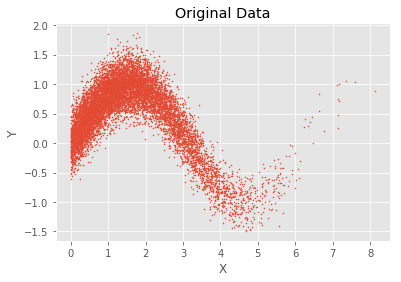

In [2]:
seed = 123
rng = np.random.RandomState(seed=seed)

num_samples = 10000
x = np.abs(2 * rng.randn(1, num_samples))
y = np.sin(x) + 0.25 * rng.randn(1, num_samples)
data = np.vstack((x, y)).T

fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Original Data')
plt.show()

## RBIG Fitting

In [4]:
n_layers = 50
rotation_type = 'PCA'
random_state = 123

# Initialize RBIG class
rbig_model = RBIG(n_layers=n_layers, rotation_type=rotation_type, random_state=random_state)

# fit model to the data
rbig_model.fit(data);

### Transform Data into Gaussian

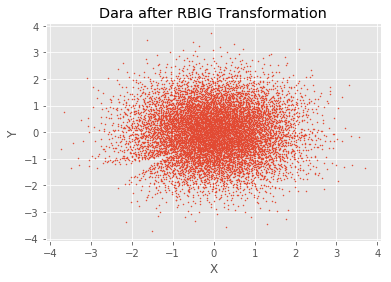

In [5]:
# transform data
data_trans = rbig_model.transform(data)

fig, ax = plt.subplots()
ax.scatter(data_trans[:, 0], data_trans[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Dara after RBIG Transformation')
plt.show()

### Information Reduction

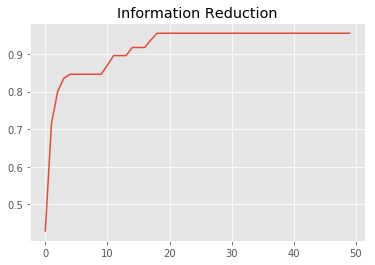

In [6]:
residual_info = rbig_model.residual_info

fig, ax = plt.subplots()
ax.plot(np.cumsum(residual_info))
ax.set_title('Information Reduction')
plt.show()

### Generated Synthetic Data

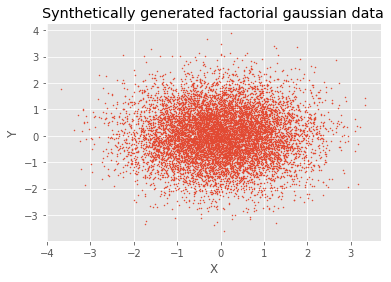

In [7]:
data_synthetic = rng.randn(data.shape[0], data.shape[1])

fig, ax = plt.subplots()
ax.scatter(data_synthetic[:, 0], data_synthetic[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Synthetically generated factorial gaussian data')
plt.show()

### Synthesize New Data from RBIG Model

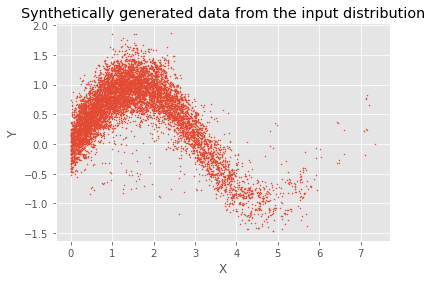

In [8]:
data_original_synthetic = rbig_model.inverse_transform(data_synthetic)

fig, ax = plt.subplots()
ax.scatter(data_original_synthetic[:, 0], data_original_synthetic[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Synthetically generated data from the input distribution')
plt.show()

### Check Residuals: Transformation $\rightarrow$ Inverse Transformation

In [9]:
data_inverted = rbig_model.inverse_transform(data_trans)
residual = np.abs(data - data_inverted).sum().sum()

print(f'Residual from Original and Transformed: {residual:.2e}')

Residual from Original and Transformed: 4.42e-11


### Jacobian

In [12]:
jacobian, data_rbig = rbig_model.jacobian(data)

print(jacobian.shape)

print(f"Jacobian - min: {jacobian.min():.3e}, max: {jacobian.max():.3e}")
print(f"Data RBIG - min: {data_rbig.min():.3e}, max: {data_rbig.max():.3e}")

(10000, 2, 2)
Jacobian - min: -3.695e+11, max: 6.460e+12
Data RBIG - min: -3.725e+00, max: 3.720e+00


### Estimating Probabilities with RBIG

In [18]:
prob_input, prob_gauss = rbig_model.estimate_prob(data, domain='both', n_trials=10)
print(f"Prob Input - min: {prob_input.min():.3e}, max: {prob_input.max():.3e}")
print(f"Prob Gauss - min: {prob_gauss.min():.3e}, max: {prob_gauss.max():.3e}")
print(f"Det:: {rbig_model.det_jacobians:.3e}")


Prob Input - min: 0.000e+00, max: 2.857e+00
Prob Gauss - min: 0.000e+00, max: 1.591e-01
Det:: 5.012e+00


### Original Data with Probabilities

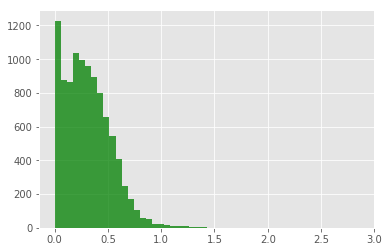

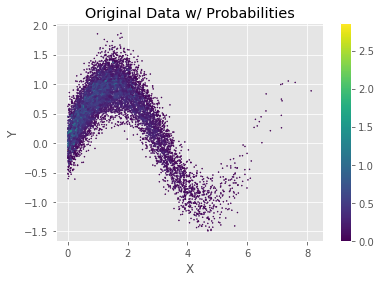

In [22]:
fig, ax = plt.subplots()
ax.hist(prob_input, 50, facecolor='green', alpha=0.75)
plt.show()

fig, ax = plt.subplots()

h = ax.scatter(data[:, 0], data[:, 1], s=1, c=prob_input)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(h)
ax.set_title('Original Data w/ Probabilities')
plt.show()

### Probability in Gaussian Domain

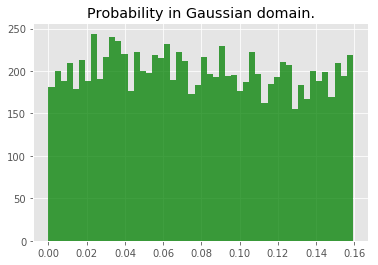

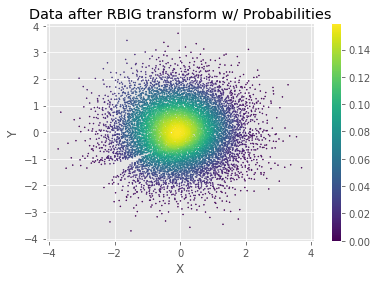

In [21]:
# Plot the probability of the data in the Gaussian Domain
fig, ax = plt.subplots()

n, bins, patches = ax.hist(prob_gauss, 50, facecolor='green', alpha=0.75)
ax.set_title('Probability in Gaussian domain.')
plt.show()


# Plot the Probabilities of the data using colors
fig, ax = plt.subplots()
g = ax.scatter(data_trans[:, 0], data_trans[:, 1],
               s=1, c=prob_gauss)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Data after RBIG transform w/ Probabilities')
plt.colorbar(g)
plt.show()
